In [210]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [211]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [212]:
train_generator = train_datagen.flow_from_directory('dataset/train',target_size=(150, 150),class_mode='categorical')
val_generator = train_datagen.flow_from_directory('dataset/validation',target_size=(150, 150),class_mode='categorical')

Found 1360 images belonging to 15 classes.
Found 1360 images belonging to 15 classes.


In [213]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [214]:
num_classes = train_generator.num_classes
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(150,150,3)),  
  MaxPool2D(),Flatten(),                                                                                             
  Dense(num_classes, activation='softmax')                            
])

In [215]:
model.compile('adam', 'categorical_crossentropy',metrics=['accuracy'])             

In [216]:
model.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3
43/43 [==============================] - 28s 637ms/step - loss: 4.4617 - accuracy: 0.2779 - val_loss: 1.4207 - val_accuracy: 0.6176
Epoch 2/3
43/43 [==============================] - 25s 578ms/step - loss: 1.0884 - accuracy: 0.6912 - val_loss: 0.5470 - val_accuracy: 0.8603
Epoch 3/3
43/43 [==============================] - 25s 577ms/step - loss: 0.4104 - accuracy: 0.9000 - val_loss: 0.1862 - val_accuracy: 0.9728


In [250]:
def predict_fn(images):
    imgs = images.astype('float32') / 255.0
    return model.predict(imgs) 

In [251]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [252]:
!pip install lime

In [253]:
from lime.lime_image import LimeImageExplainer

In [254]:
explainer = LimeImageExplainer()

In [255]:
sample_img, label = next(val_generator)
img = sample_img[0]
true_class = np.argmax(label[0])

In [256]:
exp = explainer.explain_instance(
    img,     
    predict_fn,
)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 79ms/step


  1%|▊                                                                               | 10/1000 [00:00<00:18, 52.45it/s]

1/1 [==============================] - 0s 80ms/step


  2%|█▌                                                                              | 20/1000 [00:00<00:17, 55.05it/s]

1/1 [==============================] - 0s 79ms/step


  3%|██▍                                                                             | 30/1000 [00:00<00:18, 53.85it/s]

1/1 [==============================] - 0s 111ms/step


  4%|███▏                                                                            | 40/1000 [00:00<00:19, 49.97it/s]

1/1 [==============================] - 0s 85ms/step


  5%|████                                                                            | 50/1000 [00:01<00:20, 46.78it/s]

1/1 [==============================] - 0s 79ms/step


  6%|████▊                                                                           | 60/1000 [00:01<00:20, 46.17it/s]

1/1 [==============================] - 0s 79ms/step


  7%|█████▌                                                                          | 70/1000 [00:01<00:19, 46.90it/s]

1/1 [==============================] - 0s 79ms/step


  8%|██████▍                                                                         | 80/1000 [00:01<00:19, 47.40it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███████▏                                                                        | 90/1000 [00:01<00:19, 46.64it/s]

1/1 [==============================] - 0s 95ms/step


 10%|███████▉                                                                       | 100/1000 [00:02<00:19, 47.21it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████████▋                                                                      | 110/1000 [00:02<00:18, 47.59it/s]

1/1 [==============================] - 0s 79ms/step


 12%|█████████▍                                                                     | 120/1000 [00:02<00:17, 48.99it/s]

1/1 [==============================] - 0s 111ms/step


 13%|██████████▎                                                                    | 130/1000 [00:02<00:17, 48.80it/s]

1/1 [==============================] - 0s 79ms/step


 14%|███████████                                                                    | 140/1000 [00:02<00:18, 47.52it/s]

1/1 [==============================] - 0s 79ms/step


 15%|███████████▊                                                                   | 150/1000 [00:03<00:17, 48.92it/s]

1/1 [==============================] - 0s 111ms/step


 16%|████████████▋                                                                  | 160/1000 [00:03<00:17, 47.51it/s]

1/1 [==============================] - 0s 111ms/step


 17%|█████████████▍                                                                 | 170/1000 [00:03<00:17, 47.99it/s]

1/1 [==============================] - 0s 78ms/step


 18%|██████████████▏                                                                | 180/1000 [00:03<00:16, 49.21it/s]

1/1 [==============================] - 0s 79ms/step


 19%|███████████████                                                                | 190/1000 [00:03<00:16, 50.13it/s]

1/1 [==============================] - 0s 111ms/step


 20%|███████████████▊                                                               | 200/1000 [00:04<00:16, 48.91it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████████████▌                                                              | 210/1000 [00:04<00:16, 48.42it/s]

1/1 [==============================] - 0s 70ms/step


 22%|█████████████████▍                                                             | 220/1000 [00:04<00:15, 49.66it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:04<00:14, 51.60it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██████████████████▉                                                            | 240/1000 [00:04<00:15, 50.56it/s]

1/1 [==============================] - 0s 79ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:05<00:14, 51.13it/s]

1/1 [==============================] - 0s 79ms/step


 26%|████████████████████▌                                                          | 260/1000 [00:05<00:14, 51.54it/s]

1/1 [==============================] - 0s 80ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:05<00:14, 51.81it/s]

1/1 [==============================] - 0s 79ms/step


 28%|██████████████████████                                                         | 280/1000 [00:05<00:13, 52.06it/s]

1/1 [==============================] - 0s 79ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:05<00:13, 53.53it/s]

1/1 [==============================] - 0s 88ms/step


 30%|███████████████████████▋                                                       | 300/1000 [00:06<00:13, 53.24it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:06<00:13, 51.69it/s]

1/1 [==============================] - 0s 95ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [00:06<00:13, 50.70it/s]

1/1 [==============================] - 0s 79ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:06<00:13, 50.03it/s]

1/1 [==============================] - 0s 95ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [00:06<00:13, 49.58it/s]

1/1 [==============================] - 0s 111ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:07<00:13, 48.07it/s]

1/1 [==============================] - 0s 80ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [00:07<00:12, 49.30it/s]

1/1 [==============================] - 0s 79ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [00:07<00:12, 50.29it/s]

1/1 [==============================] - 0s 79ms/step


 38%|██████████████████████████████                                                 | 380/1000 [00:07<00:12, 49.74it/s]

1/1 [==============================] - 0s 79ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [00:07<00:12, 49.41it/s]

1/1 [==============================] - 0s 94ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:08<00:12, 48.06it/s]

1/1 [==============================] - 0s 95ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [00:08<00:12, 48.16it/s]

1/1 [==============================] - 0s 79ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:08<00:11, 49.40it/s]

1/1 [==============================] - 0s 95ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [00:08<00:11, 47.99it/s]

1/1 [==============================] - 0s 95ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [00:08<00:11, 48.13it/s]

1/1 [==============================] - 0s 125ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [00:09<00:12, 45.07it/s]

1/1 [==============================] - 0s 79ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [00:09<00:11, 47.08it/s]

1/1 [==============================] - 0s 95ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [00:09<00:11, 46.45it/s]

1/1 [==============================] - 0s 111ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [00:09<00:11, 44.07it/s]

1/1 [==============================] - 0s 79ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [00:10<00:11, 46.32it/s]

1/1 [==============================] - 0s 95ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [00:10<00:10, 48.00it/s]

1/1 [==============================] - 0s 95ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [00:10<00:10, 48.12it/s]

1/1 [==============================] - 0s 95ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [00:10<00:09, 48.22it/s]

1/1 [==============================] - 0s 87ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [00:10<00:09, 48.30it/s]

1/1 [==============================] - 0s 95ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [00:11<00:09, 48.34it/s]

1/1 [==============================] - 0s 96ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:11<00:09, 46.25it/s]

1/1 [==============================] - 0s 95ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [00:11<00:09, 47.98it/s]

1/1 [==============================] - 0s 95ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [00:11<00:08, 48.13it/s]

1/1 [==============================] - 0s 79ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:11<00:08, 48.26it/s]

1/1 [==============================] - 0s 79ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [00:12<00:08, 48.31it/s]

1/1 [==============================] - 0s 111ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [00:12<00:08, 45.64it/s]

1/1 [==============================] - 0s 100ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [00:12<00:08, 46.11it/s]

1/1 [==============================] - 0s 111ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [00:12<00:07, 47.85it/s]

1/1 [==============================] - 0s 95ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [00:12<00:07, 46.97it/s]

1/1 [==============================] - 0s 79ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [00:13<00:07, 47.44it/s]

1/1 [==============================] - 0s 95ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [00:13<00:07, 47.76it/s]

1/1 [==============================] - 0s 79ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [00:13<00:07, 48.00it/s]

1/1 [==============================] - 0s 95ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [00:13<00:07, 47.08it/s]

1/1 [==============================] - 0s 79ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [00:13<00:06, 49.73it/s]

1/1 [==============================] - 0s 111ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [00:14<00:06, 49.37it/s]

1/1 [==============================] - 0s 127ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [00:14<00:06, 49.11it/s]

1/1 [==============================] - 0s 79ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [00:14<00:05, 50.04it/s]

1/1 [==============================] - 0s 111ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [00:14<00:05, 49.63it/s]

1/1 [==============================] - 0s 95ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [00:14<00:05, 51.73it/s]

1/1 [==============================] - 0s 95ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [00:15<00:05, 51.96it/s]

1/1 [==============================] - 0s 111ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [00:15<00:04, 50.91it/s]

1/1 [==============================] - 0s 86ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [00:15<00:04, 51.33it/s]

1/1 [==============================] - 0s 79ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [00:15<00:04, 52.98it/s]

1/1 [==============================] - 0s 95ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [00:15<00:04, 52.84it/s]

1/1 [==============================] - 0s 95ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [00:16<00:04, 51.42it/s]

1/1 [==============================] - 0s 79ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [00:16<00:03, 53.03it/s]

1/1 [==============================] - 0s 96ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [00:16<00:03, 52.84it/s]

1/1 [==============================] - 0s 95ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [00:16<00:03, 54.09it/s]

1/1 [==============================] - 0s 95ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [00:16<00:03, 53.62it/s]

1/1 [==============================] - 0s 79ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [00:17<00:03, 52.42it/s]

1/1 [==============================] - 0s 95ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [00:17<00:02, 53.35it/s]

1/1 [==============================] - 0s 79ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [00:17<00:02, 55.95it/s]

1/1 [==============================] - 0s 95ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [00:17<00:02, 56.37it/s]

1/1 [==============================] - 0s 70ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [00:17<00:02, 56.59it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [00:17<00:01, 55.23it/s]

1/1 [==============================] - 0s 80ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [00:18<00:01, 57.33it/s]

1/1 [==============================] - 0s 85ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [00:18<00:01, 57.31it/s]

1/1 [==============================] - 0s 96ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [00:18<00:01, 54.36it/s]

1/1 [==============================] - 0s 79ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [00:18<00:01, 53.79it/s]

1/1 [==============================] - 0s 84ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [00:18<00:01, 52.11it/s]

1/1 [==============================] - 0s 94ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [00:19<00:00, 51.02it/s]

1/1 [==============================] - 0s 89ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [00:19<00:00, 51.47it/s]

1/1 [==============================] - 0s 94ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [00:19<00:00, 51.43it/s]

1/1 [==============================] - 0s 100ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [00:19<00:00, 49.77it/s]

1/1 [==============================] - 0s 90ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:19<00:00, 50.56it/s]

1/1 [==============================] - 0s 94ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.91it/s]


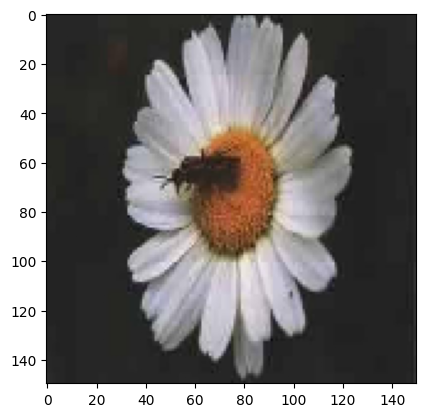

In [257]:
temp, mask = exp.get_image_and_mask(exp.top_labels[0])
plt.imshow(img)

In [258]:
from skimage.segmentation import mark_boundaries

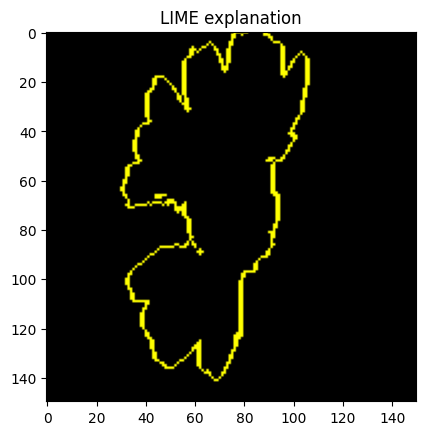

In [259]:
plt.imshow(mark_boundaries(img/255.0, mask))
plt.title(f'LIME explanation')
plt.show()